## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)

## Importing the datasets

In [2]:
data =pd.read_csv(r"D:\Jupiter_notebook\Training_Project\Data\DS\heart.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Taking care of missing values

In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
# check
# data_dup = data.duplicated().any
data_dup = data.duplicated().any()

In [6]:
data_dup

True

In [7]:
data= data.drop_duplicates()

In [8]:
# data_dup = data.duplicated().any
data_dup = data.duplicated().any()

In [9]:
data_dup

False

## Data processing

In [10]:
cate_val = []
cont_val = []

for column in data.columns:
    if data[column].nunique() <= 10:
        cate_val.append(column)
    else:
        cont_val.append(column)
        
        

In [11]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [12]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

## Encoding categorical data

In [14]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [15]:
data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [16]:
cate_val.remove('sex')
cate_val.remove('target')

In [17]:
cate_val

['cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [69]:
data = pd.get_dummies?

In [18]:
data = pd.get_dummies(data, columns = cate_val, drop_first=True)

In [19]:
data

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,120,211,115,1.5,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
733,44,0,108,141,175,0.6,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
739,52,1,128,255,161,0.0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
843,59,1,160,273,125,0.0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


## Feature scaling

In [20]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [21]:
from sklearn.preprocessing import StandardScaler

 
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [22]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


## Splitting the datasets into the training set and test set

In [23]:
X = data.drop('target', axis=1)

In [24]:
y = data['target']

In [25]:
from sklearn.model_selection import train_test_split

X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=42)

In [26]:
X_train

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
163,-0.710788,1,-0.433587,0.532247,0.718568,-0.468334,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
291,0.396267,1,-0.205463,0.241930,-0.855851,1.687716,0,0,0,0,...,1,1,0,0,1,0,0,0,0,1
280,-1.042904,0,-0.091401,-0.241930,1.112172,-0.382092,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
85,-1.153610,1,-0.661712,-0.512893,0.893503,-0.899544,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
239,0.839089,0,1.049221,-0.048386,0.193761,0.307844,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,1.392616,1,-0.661712,-0.183867,-3.436149,-0.037124,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
77,0.949794,1,0.478910,-1.151589,-0.243577,2.550136,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
125,0.617678,0,1.049221,-0.125804,0.937237,-0.123366,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
522,1.392616,0,1.163283,0.590310,0.980971,-0.899544,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0


In [27]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

## Training models vs Linear ML Algorithm

### Logistic Regression

In [28]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [29]:
from sklearn.linear_model import LogisticRegression



In [30]:
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [31]:
y_pred1 = log.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred1)

0.7868852459016393

### SVC


In [33]:
from sklearn import svm

In [34]:
svm = svm.SVC()

In [35]:
svm.fit(X_train, y_train)

SVC()

In [36]:
y_pred2 = svm.predict(X_test)

In [37]:
accuracy_score(y_test, y_pred2)

0.8032786885245902

### KNeighbors Clssifier

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:

knn = KNeighborsClassifier()

In [40]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [41]:
y_pred3 = knn.predict(X_test)

In [42]:
accuracy_score(y_pred3, y_test)

0.7377049180327869

In [43]:
score = []

for k in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred3 = knn.predict(X_test)
    score.append(accuracy_score(y_test, y_pred3))
    

In [44]:
score

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

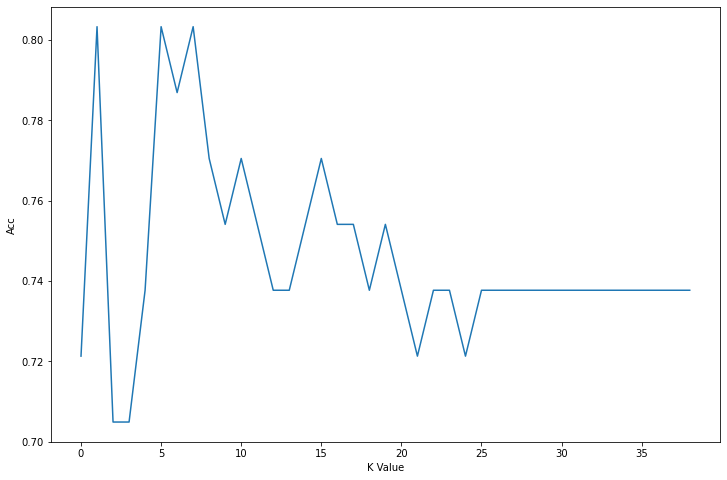

In [45]:
plt.plot(score)
plt.xlabel("K Value")
plt.ylabel("Acc")
plt.show();

In [46]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred3 = knn.predict(X_test)
accuracy_score(y_test, y_pred3)

0.8032786885245902

## Training model vs Non-Linear ML Algorithm


In [47]:
data = pd.read_csv(r"D:\Jupiter_notebook\Training_Project\Data\DS\heart.csv")

In [49]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [50]:

data = data.drop_duplicates()

In [52]:
X = data.drop("target", axis=1)
y = data['target']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=42)

### Decision Tree Classifier

In [56]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()



In [57]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [58]:
y_pred4 = dt.predict(X_test)

In [59]:
accuracy_score(y_test, y_pred4)

0.7213114754098361

### Random Forest Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [61]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [62]:
y_pred5 = rf.predict(X_test)

In [63]:
accuracy_score(y_test, y_pred5)

0.8524590163934426

## Gradient Boosting Classifier

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

In [65]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [66]:
y_pred6 = gbc.predict(X_test)

In [67]:
accuracy_score(y_test, y_pred6)

0.8032786885245902

### General results

In [68]:
final_data = pd.DataFrame({"Models": ["LR", "SVM", "KNN", "DT", "RF", "GB"],
                          "Accuracy":[accuracy_score(y_test, y_pred1)*100,
                                     accuracy_score(y_test, y_pred2)*100,
                                     accuracy_score(y_test, y_pred3)*100,
                                     accuracy_score(y_test, y_pred4)*100,
                                     accuracy_score(y_test, y_pred5)*100,
                                     accuracy_score(y_test, y_pred6)*100]})

In [69]:
final_data

,Models,Accuracy
0,LR,78.688525
1,SVM,80.327869
2,KNN,80.327869
3,DT,72.131148
4,RF,85.245902
5,GB,80.327869


D:\INSTALL\anacoda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


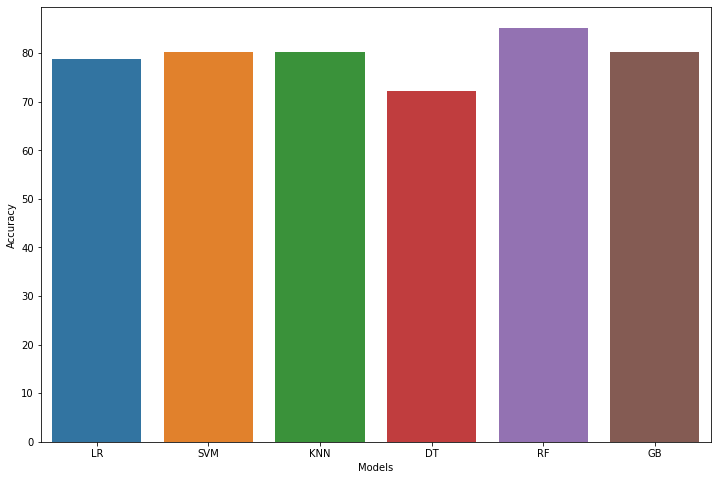

In [73]:
## visuali results

import seaborn as sns

sns.barplot(final_data['Models'], final_data["Accuracy"]);

$=>$ Vậy kết quả cho thấy mô hình Random Forest Classifier mang kết quả tốt nhất

### Predict on new data

In [74]:
X = data.drop("target", axis=1)
y = data['target']

In [75]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [76]:
rf.fit(X, y)

RandomForestClassifier()

In [78]:
new_data = pd.DataFrame({'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
     'slope':2,
    'ca':2,
    'thal':3}, index=[0])

In [79]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [80]:
p = rf.predict(new_data)

if p[0] == 0:
    print("No disease")
else:
    print('Disease')

No disease


## Save model using joblib

In [81]:
import joblib

In [82]:
joblib.dump(rf, 'model_joblib_heart')

['model_joblib_heart']

In [83]:
model = joblib.load('model_joblib_heart')

In [84]:
model.predict(new_data)

array([0], dtype=int64)

In [85]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0
878,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


## GUI

In [113]:
from tkinter import *

def show_entry_fields():
    p1 = int(e1.get())
    p2 = int(e2.get())
    p3 = int(e3.get())
    p4 = int(e4.get())
    p5 = int(e5.get())
    p6 = int(e6.get())
    p7 = int(e7.get())
    p8 = int(e8.get())
    p9 = int(e9.get())
    p10 = float(e10.get())
    p11 = int(e11.get())
    p12 = int(e12.get())
    p13 = int(e13.get())
    
    model = joblib.load('model_joblib_heart')
    result = model.predict([[p1, p2, p3, p4, p5, p6, p7, p8,
                            p9, p10, p11, p12, p13]])
    
    if result == 0:
        Label(master, text = "No Heart Disease").grid(row = 31)
    else:
        Label(master, text = "Possibility of Heart Disease").grid(row=31)

master = Tk()
master.title("Heart Disease Predict System")


label = Label(master, text="Heart Disease Predict System",
             bg = "black", fg = "White"). \
                grid(row=0, columnspan=2)
# Label(master, text="Enter your age", background="gray74").grid(row=1)
Label(master, text="Enter your age").grid(row=1, sticky='w')
Label(master, text="Male or Female [1/0]").grid(row=2, sticky='w')
Label(master, text="Enter value of 'cp'").grid(row=3, sticky='w')
Label(master, text="Enter value of 'trestbps'").grid(row=4, sticky='w')
Label(master, text="Enter value of 'chol'").grid(row=5, sticky='w')
Label(master, text="Enter value of 'fbs'").grid(row=6, sticky='w')
Label(master, text="Enter value of 'restecg'").grid(row=7, sticky='w')
Label(master, text="Enter value of 'thalach'").grid(row=8, sticky='w')
Label(master, text="Enter value of 'exang'").grid(row=9, sticky='w')
Label(master, text="Enter value of 'oldpeak'").grid(row=10, sticky='w')
Label(master, text="Enter value of 'slope'").grid(row=11, sticky='w')
Label(master, text="Enter value of 'ca'").grid(row=12, sticky='w')
Label(master, text="Enter value of 'thal'").grid(row=13, sticky='w')

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)

Button(master, text = 'Predict', command=show_entry_fields,
      bg = "black", fg = "White").grid()

mainloop()


Exception in Tkinter callback
Traceback (most recent call last):
  File "D:\INSTALL\anacoda\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\ASUS\AppData\Local\Temp\ipykernel_10764\324704415.py", line 4, in show_entry_fields
    p1 = int(e1.get())
ValueError: invalid literal for int() with base 10: ''
